<a href="https://colab.research.google.com/github/prabirdeb/Ted-Talk-Views-Prediction/blob/main/Ted_Talk_Views_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Ted Talk Views Prediction**

## **The performance of a machine learning model depends on three factors:**

**i. Quality of Data**

(cleaner experiences for better learning)

**ii. Quantity of Data**

(more experiences for better learning)

**iii. Quality of Model**

(right model and right hyperparameters for better learning)



# **Exploration and Pre-processing of Data**

This involves following steps to transform raw data into quality data for the ml model 

## **1. Connection with the Data**

Here, we are provided with a dataset on the details of Ted Talk Videos.

Thus, the dataset is actually a collection of experiences about different Ted Talk videos. 

Now, we need to **decode the set of experiences** to build a model for Ted Talk Videos Views Prediction.

At first, we import the libraries or functions for **making our journey easy** and then **get connected** to the set of experiences.

In [1]:
# Importing libraries
import numpy as np
import pandas as pd
from numpy import math
import ast
from datetime import datetime
from datetime import date
import re

from termcolor import colored
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import Ridge
from sklearn.svm import SVR
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

import nltk
nltk.download('stopwords')
import string
from nltk.corpus import stopwords

Using matplotlib backend: agg
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [2]:
pip install shap

     |████████████████████████████████| 564 kB 8.6 MB/s 


In [3]:
import shap
shap.initjs()

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# Reading the data as pandas dataframe
ted_talk_df=pd.read_csv('/content/drive/MyDrive/Almabetter Assignments/Capstone projects/Ted Talk Views Prediction-Prabir Debnath/data_ted_talks.csv')

## **2. First Feelings of the Data**

Here, the columns are the set of features, showing the way to reach final decoded experience or conclusions.  

As there is a huge no. of experiences, we cannot see the whole lot of experiences and therefore we find the features on the **data head**.

In [6]:
ted_talk_df.head(2)

,talk_id,title,speaker_1,all_speakers,occupations,about_speakers,views,recorded_date,published_date,event,native_lang,available_lang,comments,duration,topics,related_talks,url,description,transcript
0,1,Averting the climate crisis,Al Gore,{0: 'Al Gore'},{0: ['climate advocate']},{0: 'Nobel Laureate Al Gore focused the world’...,3523392,2006-02-25,2006-06-27,TED2006,en,"['ar', 'bg', 'cs', 'de', 'el', 'en', 'es', 'fa...",272.0,977,"['alternative energy', 'cars', 'climate change...","{243: 'New thinking on the climate crisis', 54...",https://www.ted.com/talks/al_gore_averting_the...,With the same humor and humanity he exuded in ...,"Thank you so much, Chris. And it's truly a gre..."
1,92,The best stats you've ever seen,Hans Rosling,{0: 'Hans Rosling'},{0: ['global health expert; data visionary']},"{0: 'In Hans Rosling’s hands, data sings. Glob...",14501685,2006-02-22,2006-06-27,TED2006,en,"['ar', 'az', 'bg', 'bn', 'bs', 'cs', 'da', 'de...",628.0,1190,"['Africa', 'Asia', 'Google', 'demo', 'economic...","{2056: ""Own your body's data"", 2296: 'A visual...",https://www.ted.com/talks/hans_rosling_the_bes...,You've never seen data presented like this. Wi...,"About 10 years ago, I took on the task to teac..."


## **3. Deeper Understanding of the Data**

As there is a huge no. of experiences, we take the help of **statistics to measure** each and every features in different dimensions and thus step by step, we find the most important features or the exact way to decode the experiences.

In [7]:
ted_talk_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4005 entries, 0 to 4004
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   talk_id         4005 non-null   int64  
 1   title           4005 non-null   object 
 2   speaker_1       4005 non-null   object 
 3   all_speakers    4001 non-null   object 
 4   occupations     3483 non-null   object 
 5   about_speakers  3502 non-null   object 
 6   views           4005 non-null   int64  
 7   recorded_date   4004 non-null   object 
 8   published_date  4005 non-null   object 
 9   event           4005 non-null   object 
 10  native_lang     4005 non-null   object 
 11  available_lang  4005 non-null   object 
 12  comments        3350 non-null   float64
 13  duration        4005 non-null   int64  
 14  topics          4005 non-null   object 
 15  related_talks   4005 non-null   object 
 16  url             4005 non-null   object 
 17  description     4005 non-null   o

In [8]:
ted_talk_df.describe()

,talk_id,views,comments,duration
count,4005.000000,4.005000e+03,3350.000000,4005.000000
mean,12432.538327,2.148006e+06,161.997015,724.011236
std,17447.576262,3.451226e+06,268.838922,361.775462
min,1.000000,0.000000e+00,0.000000,60.000000
25%,1252.000000,8.820690e+05,38.000000,393.000000
50%,2333.000000,1.375508e+06,89.000000,738.000000
75%,23777.000000,2.133110e+06,188.000000,974.000000
max,62794.000000,6.505195e+07,6449.000000,3922.000000


In [9]:
# Checking the unique values for each column
for column_name in ted_talk_df.columns:
  print(colored(f"Unique values for {column_name}:",'blue', attrs=['bold']))
  print(ted_talk_df[column_name].unique())

Unique values for talk_id:
[    1    92     7 ... 62263 62784 62794]
Unique values for title:
['Averting the climate crisis' "The best stats you've ever seen"
 'Simplicity sells' ... 'How "policing for profit" undermines your rights'
 'The electrifying speeches of Sojourner Truth'
 'The most important anus in the ocean']
Unique values for speaker_1:
['Al Gore' 'Hans Rosling' 'David Pogue' ... 'Dick M. Carpenter II'
 'Daina Ramey Berry' 'Cella Wright']
Unique values for all_speakers:
["{0: 'Al Gore'}" "{0: 'Hans Rosling'}" "{0: 'David Pogue'}" ...
 "{0: 'Dick M. Carpenter II'}" "{0: 'Daina Ramey Berry'}"
 "{0: 'Cella Wright'}"]
Unique values for occupations:
["{0: ['climate advocate']}"
 "{0: ['global health expert; data visionary']}"
 "{0: ['technology columnist']}" ...
 "{0: ['psychotherapist', 'psychosomatic psychiatrist']}"
 "{0: ['epidemiologist', 'philanthropist'], 1: ['head of ted']}"
 "{0: ['law researcher']}"]
Unique values for about_speakers:
["{0: 'Nobel Laureate Al Gore focu

In [10]:
# Checking the no. of unique values in each column
print(ted_talk_df.nunique())

talk_id           4005
title             4005
speaker_1         3274
all_speakers      3306
occupations       2049
about_speakers    2977
views             3996
recorded_date     1334
published_date    2962
event              459
native_lang         12
available_lang    3902
comments           601
duration          1188
topics            3977
related_talks     4005
url               4005
description       4005
transcript        4005
dtype: int64


In [11]:
ted_talk_df.columns

Index(['talk_id', 'title', 'speaker_1', 'all_speakers', 'occupations',
       'about_speakers', 'views', 'recorded_date', 'published_date', 'event',
       'native_lang', 'available_lang', 'comments', 'duration', 'topics',
       'related_talks', 'url', 'description', 'transcript'],
      dtype='object')

## **4. Cleaning the Data**

In this step, we treat null, missing, "?" or duplicate values.

When there is any string containing a Python literal in any of the important feature, we also evaluate them.

We do encoding of categorical features to make it usuable in the model.

We also create new feature when found important during the analysis.

Thus, we get a clean experience set with important features. 

We check the statistics further on clean data.

###4.1 Creating Dataset with Relavant Features

In [12]:
# Finding out the relavant features from the deeper understanding of the data
relavant_features=['occupations', 'views', 'published_date',
                   'native_lang', 'duration', 'topics','speaker_1','title']

In [13]:
# Creating new df with relavant features
ted_talk_df_clean=ted_talk_df[relavant_features]

###4.2 Treating the missing, null or duplicate values

In [14]:
# Checking is there any duplicate value
len(ted_talk_df_clean[ted_talk_df_clean.duplicated()]) 

0

In [15]:
# checking the no. of null values in each column
print(ted_talk_df_clean.isnull().sum())

occupations       522
views               0
published_date      0
native_lang         0
duration            0
topics              0
speaker_1           0
title               0
dtype: int64


In [16]:
ted_talk_df_clean.occupations

0                           {0: ['climate advocate']}
1       {0: ['global health expert; data visionary']}
2                       {0: ['technology columnist']}
3         {0: ['activist for environmental justice']}
4                         {0: ['author', 'educator']}
                            ...                      
4000                         {0: ['health activist']}
4001                                              NaN
4002                          {0: ['law researcher']}
4003                                              NaN
4004                                              NaN
Name: occupations, Length: 4005, dtype: object

In [17]:
# Imputaion of null values of occupation with emty dict string
ted_talk_df_clean['occupations']=ted_talk_df_clean['occupations'].fillna("{0:[]}")


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [18]:
print(ted_talk_df_clean.isnull().sum())

occupations       0
views             0
published_date    0
native_lang       0
duration          0
topics            0
speaker_1         0
title             0
dtype: int64


In [19]:
ted_talk_df_clean.shape

(4005, 8)

###4.3 Evaluation of Python Literals

In [20]:
# numerical_features
ted_talk_df_clean.describe().columns

Index(['views', 'duration'], dtype='object')

In [21]:
# categorical_features
ted_talk_df_clean.describe(include=['object','category']).columns

Index(['occupations', 'published_date', 'native_lang', 'topics', 'speaker_1',
       'title'],
      dtype='object')

In [22]:
print(ted_talk_df_clean.occupations.values[0])
print(ted_talk_df_clean.published_date.values[0])
print(ted_talk_df_clean.native_lang.values[0])
print(ted_talk_df_clean.topics.values[0])
print(ted_talk_df_clean.speaker_1.values[0])
print(ted_talk_df_clean.title.values[0])

{0: ['climate advocate']}
2006-06-27
en
['alternative energy', 'cars', 'climate change', 'culture', 'environment', 'global issues', 'science', 'sustainability', 'technology']
Al Gore
Averting the climate crisis


In [23]:
print(type(ted_talk_df_clean.occupations.values[0]))
print(type(ted_talk_df_clean.published_date.values[0]))
print(type(ted_talk_df_clean.native_lang.values[0]))
print(type(ted_talk_df_clean.topics.values[0]))
print(type(ted_talk_df_clean.speaker_1.values[0]))
print(type(ted_talk_df_clean.title.values[0]))

<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>


In [24]:
# There are python literals as string in the categorical columns which need to be treated
for col in ['occupations', 'topics']:
  ted_talk_df_clean[col]=[ast.literal_eval(i) for i in ted_talk_df_clean[col]]


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [25]:
print(type(ted_talk_df_clean.occupations.values[0]))
print(type(ted_talk_df_clean.published_date.values[0]))
print(type(ted_talk_df_clean.native_lang.values[0]))
print(type(ted_talk_df_clean.topics.values[0]))
print(type(ted_talk_df_clean.speaker_1.values[0]))
print(type(ted_talk_df_clean.title.values[0]))

<class 'dict'>
<class 'str'>
<class 'str'>
<class 'list'>
<class 'str'>
<class 'str'>


In [26]:
# extracting the list from the dict of occupations
ted_talk_df_clean['occupations']=[i.get(0) for i in ted_talk_df_clean['occupations']]


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [27]:
print(type(ted_talk_df_clean.occupations.values[0]))

<class 'list'>


In [28]:
# Datetime is appearing as string and we are converting to datetime
ted_talk_df_clean['published_date']=ted_talk_df_clean['published_date'].apply(lambda x : datetime.strptime(x,'%Y-%m-%d'))


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


###4.4 Feature Engineering

In [29]:
# Feature engineering on published date to to extract years run
ted_talk_df_clean['published_year']=ted_talk_df_clean['published_date'].apply(lambda x : x.year)
ted_talk_df_clean['base_year']=2021
ted_talk_df_clean['years_run']=(ted_talk_df_clean['base_year']-ted_talk_df_clean['published_year'])


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [30]:
ted_talk_df_clean.drop(['published_date','base_year','published_year'], axis = 1, inplace=True)


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [31]:
ted_talk_df_clean.head(2)

,occupations,views,native_lang,duration,topics,speaker_1,title,years_run
0,[climate advocate],3523392,en,977,"[alternative energy, cars, climate change, cul...",Al Gore,Averting the climate crisis,15
1,[global health expert; data visionary],14501685,en,1190,"[Africa, Asia, Google, demo, economics, global...",Hans Rosling,The best stats you've ever seen,15


###4.5 Encoding of Categorical Features

In [32]:
# Checking value counts in categorical features
for column_name in ted_talk_df_clean.describe(include=['object','category']).columns:
  print(colored(f"Value counts for {column_name}:", attrs=['bold']))
  print(ted_talk_df_clean[column_name].value_counts())

Value counts for occupations:
[]                             522
[writer]                        55
[journalist]                    48
[entrepreneur]                  43
[artist]                        42
                              ... 
[beatboxer and inventor]         1
[electronic systems expert]      1
[director, designer]             1
[life saver]                     1
[law researcher]                 1
Name: occupations, Length: 1990, dtype: int64
Value counts for native_lang:
en       3957
es         27
fr          9
ja          3
hi          2
de          1
pt          1
ko          1
zh-cn       1
ar          1
pt-br       1
it          1
Name: native_lang, dtype: int64
Value counts for topics:
[TED-Ed, math]                                                                                                                                                       8
[animation, TED-Ed, math]                                                                                            

In [33]:
# There are very few experiences (only 1-27) for most of the 'native_lang' as compared to 'en' with count 3975. 
# So, we are removing the exceptions in 'native_lang' category and creating a conditional df only for 'en'
ted_talk_df_clean=ted_talk_df_clean.loc[(ted_talk_df_clean['native_lang']=='en')].reset_index()
ted_talk_df_clean.drop('index', axis = 1, inplace=True)


**Now english has become the main feature of our dataset. Thus our model will predict the ted talk views only for english language**

In [34]:
# Thus we are dropping the 'native_lang' column
ted_talk_df_clean.drop('native_lang', axis = 1, inplace=True)

In [35]:
ted_talk_df_clean.shape

(3957, 7)

In [36]:
ted_talk_df_clean.head(2)

,occupations,views,duration,topics,speaker_1,title,years_run
0,[climate advocate],3523392,977,"[alternative energy, cars, climate change, cul...",Al Gore,Averting the climate crisis,15
1,[global health expert; data visionary],14501685,1190,"[Africa, Asia, Google, demo, economics, global...",Hans Rosling,The best stats you've ever seen,15


In [37]:
# There are mixture of words in topics and occupations column.
# Lets find out the main topics
main_topics=[]
for k in range(len(ted_talk_df_clean.topics)):
  common_terms=list(set([i[:3] for i in ted_talk_df_clean.occupations[k]]).intersection(set([i[:3] for i in ted_talk_df_clean.topics[k]])))
  
  if len(common_terms)!=0:
    for i in range(len(common_terms)):
      pattern = re.compile("%s" % common_terms[i])
      topics=[x for x in ted_talk_df_clean.topics[k] if pattern.match(x)][0]
  else:
    topics='unknown'

  main_topics.append(topics)

In [38]:
print(main_topics)

['climate change', 'global issues', 'technology', 'activism', 'education', 'architecture', 'comedy', 'philosophy', 'unknown', 'film', 'unknown', 'architecture', 'technology', 'unknown', 'piano', 'violin', 'engineering', 'industrial design', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'evolution', 'physics', 'unknown', 'economics', 'psychology', 'psychology', 'unknown', 'unknown', 'investment', 'unknown', 'unknown', 'unknown', 'aircraft', 'unknown', 'photography', 'unknown', 'activism', 'unknown', 'unknown', 'unknown', 'future', 'music', 'performance', 'unknown', 'success', 'unknown', 'unknown', 'anthropology', 'photography', 'astronomy', 'unknown', 'innovation', 'unknown', 'unknown', 'invention', 'unknown', 'unknown', 'photography', 'biodiversity', 'unknown', 'invention', 'biology', 'cars', 'unknown', 'unknown', 'design', 'philosophy', 'graphic design', 'unknown', 'science', 'nature', 'singer', 'unknown', 'unknown', 'unknown', 'genetics', 'art', 'marketing', 'arch

In [39]:
len(list(set(main_topics)))

232

In [40]:
ted_talk_df_clean['main_topics']=main_topics

In [41]:
ted_talk_df_clean[(ted_talk_df_clean['main_topics']=='unknown')][:2]

,occupations,views,duration,topics,speaker_1,title,years_run,main_topics
8,"[pastor, author]",3998282,1262,"[Christianity, God, culture, happiness, leader...",Rick Warren,A life of purpose,15,unknown
10,"[epidemiologist, philanthropist]",1265297,1550,"[TED Prize, collaboration, disease, ebola, glo...",Larry Brilliant,My wish: Help me stop pandemics,15,unknown


In [42]:
ted_talk_df_clean['main_topics'].value_counts()

unknown         2310
art               69
education         58
design            54
neuroscience      52
                ... 
sports             1
speech             1
violence           1
animation          1
epidemiology       1
Name: main_topics, Length: 232, dtype: int64

In [43]:
ted_talk_df_clean.drop(['occupations'], axis = 1, inplace=True)

In [44]:
ted_talk_df_clean.head(2)

,views,duration,topics,speaker_1,title,years_run,main_topics
0,3523392,977,"[alternative energy, cars, climate change, cul...",Al Gore,Averting the climate crisis,15,climate change
1,14501685,1190,"[Africa, Asia, Google, demo, economics, global...",Hans Rosling,The best stats you've ever seen,15,global issues


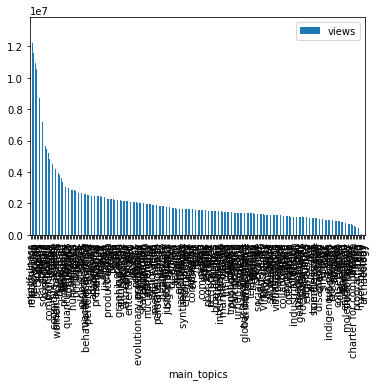

In [45]:
topics_df=pd.DataFrame(ted_talk_df_clean.groupby('main_topics')['views'].mean().sort_values(ascending=False))
topics_df.plot.bar()

In [46]:
# In the above barplot, we can find a strong relation of topics with average views
# There is a great portion of 'unkown' topics which need to be treated
# Now, we can divide topics into three categories: Highly Favourite:2, Medium Favourite:1, Least Favourite:0
topics_df.rename(columns={'views':'views_mean'},inplace=True)
least_favourite=set(topics_df[(topics_df.views_mean<0.2*10**7)].index)-{'unknown'}
medium_favourite=set(topics_df[(topics_df.views_mean>=0.2*10**7) & (topics_df.views_mean< 0.5*10**7)].index)-{'unknown'}
highly_favourite=set(topics_df[(topics_df.views_mean>=0.5*10**7)].index)-{'unknown'}

topics_cat=[]
for k in ted_talk_df_clean.topics:
  topics_least_favourite_match=len(list(set(k).intersection(least_favourite)))
  topics_medium_favourite_match=len(list(set(k).intersection(medium_favourite)))
  topics_highly_favourite_match=len(list(set(k).intersection(highly_favourite)))

  if (topics_least_favourite_match>topics_medium_favourite_match) & (topics_least_favourite_match>topics_highly_favourite_match):
    topics_cat.append(0)
  elif (topics_medium_favourite_match>topics_least_favourite_match) & (topics_medium_favourite_match>topics_highly_favourite_match):
    topics_cat.append(1)
  else:
    topics_cat.append(2)

ted_talk_df_clean['topics_cat']=topics_cat


In [47]:
ted_talk_df_clean.drop(['topics', 'main_topics'], axis = 1, inplace=True)

In [48]:
print(highly_favourite)

{'social media', 'leadership', 'success', 'magic', 'conducting', 'sound', 'mindfulness', 'bionics', 'sports', 'personality', 'psychology', 'comedy', 'relationships'}


In [49]:
print(medium_favourite)

{'happiness', 'behavioral economics', 'communication', 'blockchain', 'brain', 'physics', 'literature', 'entertainment', 'sustainability', 'future', 'neuroscience', 'skateboarding', 'graphic design', 'peace', 'rap', 'anthropology', 'aircraft', 'novel', 'entrepreneur', 'web', 'glacier', 'poetry', 'garden', 'quantum physics', 'sleep', 'urban', 'philanthropy', 'hack', 'human rights', 'money', 'women in business', 'gaming', 'global issues', 'origami', 'performance art', 'marketing', 'product design', 'oceans', 'business', 'machine learning', 'race', 'medical research', 'health', 'prosthetics', 'dinosaurs', 'philosophy', 'language', 'geology', 'primates', 'death', 'presentation', 'history', 'advertising', 'finance', 'math', 'software', 'composing', 'education', 'policy', 'writing', 'cognitive science', 'morality', 'culture', 'children', 'evolutionary psychology'}


In [50]:
print(least_favourite)

{'virus', 'animation', 'biomechanics', 'molecular biology', 'climate change', 'social change', 'encryption', 'society', 'military', 'charter for compassion', 'teaching', 'theater', 'invention', 'flight', 'compassion', 'immigration', 'humanity', 'guitar', 'plastic', 'drones', 'performance', 'film', 'biology', 'investment', 'law', 'astronomy', 'economics', 'politics', 'guns', 'space', 'open-source', 'botany', 'data', 'meme', 'surveillance', 'medicine', 'homelessness', 'astrobiology', 'violence', 'farming', 'technology', 'crime', 'journalism', 'conservation', 'materials', 'library', 'complexity', 'food', 'gender equality', 'transportation', 'parenting', 'chemistry', 'cities', 'personal growth', 'painting', 'synthetic biology', 'justice system', 'activism', 'piano', 'urban planning', 'biodiversity', 'prison', 'energy', 'science', 'art', 'creativity', 'violin', 'trust', 'disaster relief', 'plants', 'archaeology', 'cancer', 'nuclear energy', 'biotech', 'virtual reality', 'architecture', 'div

In [51]:
ted_talk_df_clean.head(2)

,views,duration,speaker_1,title,years_run,topics_cat
0,3523392,977,Al Gore,Averting the climate crisis,15,0
1,14501685,1190,Hans Rosling,The best stats you've ever seen,15,0


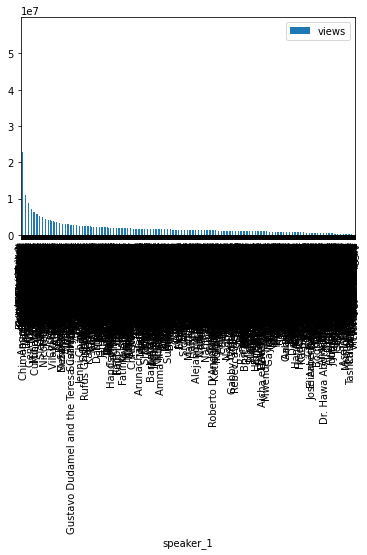

In [52]:
speaker_df=pd.DataFrame(ted_talk_df_clean.groupby('speaker_1')['views'].mean().sort_values(ascending=False))
speaker_df.plot.bar()

In [53]:
# In the above bar plot, we can find there is a strong relationship of speaker with views.
# Thus we can divide speakers into three categories: Highly Famous:2, Medium Famous:1, Least Famous:0
speaker_df.rename(columns={'views':'views_mean'},inplace=True)
ted_talk_df_clean = ted_talk_df_clean.merge(speaker_df,on = 'speaker_1',how = 'left')
ted_talk_df_clean['speaker_cat'] = ted_talk_df_clean['views_mean'].apply(lambda x : 0 if x < 0.4*10**7 else (1 if 0.4*10**7 <= x < 0.8*10**7 else 2))


In [54]:
ted_talk_df_clean["speaker_cat"].value_counts()

0    3564
1     277
2     116
Name: speaker_cat, dtype: int64

In [55]:
ted_talk_df_clean[(ted_talk_df_clean['speaker_cat']==2)]['speaker_1'][:5]

4       Sir Ken Robinson
28           Dan Gilbert
48      Richard St. John
197    Jill Bolte Taylor
208      Stephen Hawking
Name: speaker_1, dtype: object

In [56]:
ted_talk_df_clean.drop(['speaker_1','views_mean'],axis=1,inplace=True)

In [57]:
# Lets understand the sentiment of the title and encode 
# We can divide title into three categories: Highly Attractive:2, Medium Attractive:1, Least Attractive:0
def text_process(text):
    nopunc =[char for char in text if char not in string.punctuation]
    nopunc=''.join(nopunc)
    return ' '.join([word for word in nopunc.split() if word.lower() not in stopwords.words('english')])

In [58]:
ted_talk_df_clean['title'] = ted_talk_df_clean['title'].apply(text_process)

In [59]:
# Extracting the highly attractive words from title
highly=''
for k in ted_talk_df_clean[(ted_talk_df_clean['views']>0.8*10**7)]['title'].values:
  highly=highly+' '+k
highly_attractive=set(highly.split())

In [60]:
# Extracting the medium attractive words from title
medium=''
for k in ted_talk_df_clean[(ted_talk_df_clean['views']>=0.4*10**7) & (ted_talk_df_clean['views']<=0.8*10**7)]['title'].values:
  medium=medium+' '+k
medium_attractive=set(medium.split())

In [61]:
# Extracting the least attractive words from title
least=''
for k in ted_talk_df_clean[(ted_talk_df_clean['views']<0.4*10**7)]['title'].values:
  least=least+' '+k
least_attractive=set(least.split())

In [62]:
highly_attractive_words=highly_attractive-highly_attractive.intersection(medium_attractive)-highly_attractive.intersection(least_attractive)
print(highly_attractive_words)

{'mouth', 'shooter', 'miracles', 'spaghetti', 'hat', 'gain', 'thinkers', 'Baptist', 'procrastinator', 'Choice', 'email', 'SixthSense', 'Mathemagic', 'asking', 'Infinite', 'yoyo', '12yearold', 'kinder', 'Depression', 'valley', 'Church', 'loathsome', 'Believe', 'athletic', 'original', '18', 'elusive', 'quadcopters', 'Strange', 'cheat', 'gentler', 'screwing', 'Beats', 'hallucination', 'drink', 'psychopath', 'Questioning', 'palsy', 'Thoughts', 'perseverance', 'infidelity', 'interaction', 'greeneyed', 'bionics', 'mosquito', 'brainchanging', 'gods', 'stressed', 'Iranian', 'unsubscribe', 'Hotel', 'insight', 'hallucinates', 'Marine', 'actor', 'Jetman', 'desire', 'Sleep', 'Qatari', 'perpetual', 'instrument', 'Westboro', 'ropes', 'longterm', 'climb', 'stroke', 'climbed', 'astonishments', 'Questions', 'misdirection', 'habit', 'educations', 'athletes', 'liar', 'reply', 'Grit', 'dazzling', 'famously', 'believing', 'mindful', 'Try', 'spam', '3000foot', 'bird', 'personality', 'Riddle', 'floaty', 'org

In [63]:
medium_attractive_words=medium_attractive-medium_attractive.intersection(highly_attractive)-least_attractive.intersection(least_attractive)
print(medium_attractive_words)

{'starve', 'Remote', 'Daedalus', 'overparenting', 'another', 'Atlantic', 'neoNazi', 'night', 'descent', 'posture', 'David', 'succeeding', 'Spot', 'tattoos', 'filthy', 'succeed', 'dealing', 'beatboxing', 'SolarCity', 'leader', 'attraction', 'Jersey', 'competitors', 'evil', 'penis', 'reconciliation', 'passcode', 'bravery', 'crossing', 'SpaceX', 'giver', 'smiling', 'aliens', 'temple', 'Less', 'disarming', 'productively', 'crashed', 'Thor', 'Greenland', 'virtuosity', 'bullied', 'nerds', 'tsunamis', 'Icarus', 'Virgins', 'Falling', 'lefthanded', 'Teachers', 'duo', 'ugliest', 'adults', 'Night', 'Goghs', 'charming', 'Closeup', 'creations', 'rejection', 'flags', 'seems', 'higher', 'tower', 'comfortable', 'tie', 'satisfying', 'neutral', 'Wii', 'freakonomics', 'Imaging', 'charity', 'cheese', 'guitarist', 'colors', 'Homeopathy', 'extra', 'truly', 'trillion', 'supercollider', 'wandering', 'stocks', 'theyll', 'grateful', 'Fibonacci', 'manhood', 'today', 'Militant', 'continuous', 'hire', 'Optical', '

In [64]:
least_attractive_words=least_attractive-least_attractive.intersection(medium_attractive)-least_attractive.intersection(highly_attractive)
print(least_attractive_words)

{'pills', 'emoticons', 'friendship', 'meetings', 'funded', 'untamed', 'Navy', 'around', 'cartoons', 'risky', 'Nationalism', 'Porque', 'instruments', 'Bonaparte', 'mainframe', 'economy', 'Moving', 'law', 'Adjustable', 'Tubman', 'marshmallow', 'battles', 'dying', 'data', 'talent', 'provocative', 'mindshifting', 'Chasms', 'Glowinthedark', 'fat', 'Elvish', 'Da', 'materials', 'aim', 'da', 'office', 'otherness', 'gun', 'dictator', 'Suspended', 'Migration', 'donate', 'farms', 'roads', 'dollar', 'piano', 'hit', 'manipulated', 'Crime', 'mosquitoes', 'greater', 'Undocumented', 'upstream', 'Islam', 'Earthlike', 'fields', 'Ecology', 'beatbox', 'information', 'Nigeria', 'safer', 'Watson', 'arguments', 'weather', 'Philosophy', 'mama', 'Months', 'capsules', 'opensourced', 'touch', 'miscommunication', 'text', 'Apollo', 'vaccinating', 'crop', 'rent', 'leaving', 'modern', 'Resistance', 'Twilight', 'sold', 'catch', 'came', 'accelerating', 'Community', 'motherhood', 'transfusions', 'infinite', 'colony', '

In [65]:
# Title encoding
title_cat=[]
for k in ted_talk_df_clean.title:
  least_attractive_words_match=len(list(set(k.split()).intersection(least_attractive_words)))
  medium_attractive_words_match=len(list(set(k.split()).intersection(medium_attractive_words)))
  highly_attractive_words_match=len(list(set(k.split()).intersection(highly_attractive_words)))

  if (least_attractive_words_match>medium_attractive_words_match) & (least_attractive_words_match>highly_attractive_words_match):
    title_cat.append(0)
  elif (medium_attractive_words_match>least_attractive_words_match) & (medium_attractive_words_match>highly_attractive_words_match):
    title_cat.append(1)
  else:
    title_cat.append(2)

ted_talk_df_clean['title_cat']=title_cat


In [66]:
ted_talk_df_clean.drop(['title'],axis=1,inplace=True)

In [67]:
# Arranging dependent feature in the last column
dependent=ted_talk_df_clean.views.values
ted_talk_df_clean.drop(['views'],axis=1,inplace=True)
ted_talk_df_clean['views']=dependent

In [68]:
ted_talk_df_clean.head(2)

,duration,years_run,topics_cat,speaker_cat,title_cat,views
0,977,15,0,0,0,3523392
1,1190,15,0,0,2,14501685


## **5. Treating Anomalies in the Data**

While, we are finding out the **general formula** from the experiences, we should identify the true **outliers** or **exceptional or abnormal experiences** and keep them aside.

In [69]:
# Converting numerical feature to categorical feature for outlier experience detection
# Thus we can divide numerical features into two categories: Highly and Low
outlier_detect_df=ted_talk_df_clean[ted_talk_df_clean.describe().columns]

for col in outlier_detect_df.describe().columns[:2]:
  limit=outlier_detect_df[col].min()+(outlier_detect_df[col].max()-outlier_detect_df[col].min())/2
  outlier_detect_df[col] = ted_talk_df_clean[col].apply(lambda x : 'low' if x < limit else 'high')


Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
Creating an ndarray from ragged nested seque

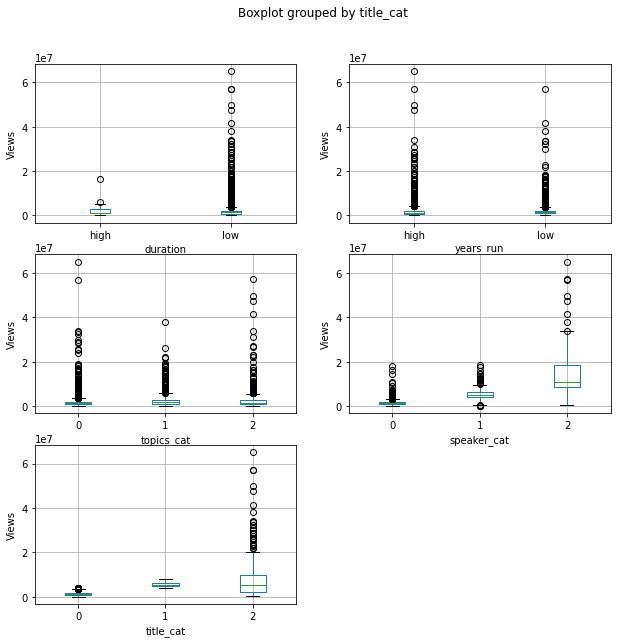

In [70]:
# Checking outliers
fig = plt.figure(figsize=(10, 10))
a=1
for col in outlier_detect_df.columns[:5]:
  plt.subplot(3,2, a)
  ax = fig.gca()
  outlier_detect_df.boxplot(column = 'views', by = col, ax = ax)
  ax.set_title('');
  ax.set_ylabel("Views")
  a=a+1
plt.show()

In [71]:
len(ted_talk_df_clean[ted_talk_df_clean['views'] > 1*10**7])

89

In [72]:
# There are only few experiences with more than 1*10^7 views. Thus we can remove these experiences
ted_talk_df_clean=ted_talk_df_clean[ted_talk_df_clean['views'] < 1*10**7]

In [73]:
ted_talk_df_clean.shape

(3868, 6)

## **6. Final Feature Selection from the Data**

Now we need to understand the distribution of the features and the relationship among the features for the decision of transformation, scaling and final selection of features.

###6.1 Overall Feature Understanding

<Figure size 504x504 with 0 Axes>

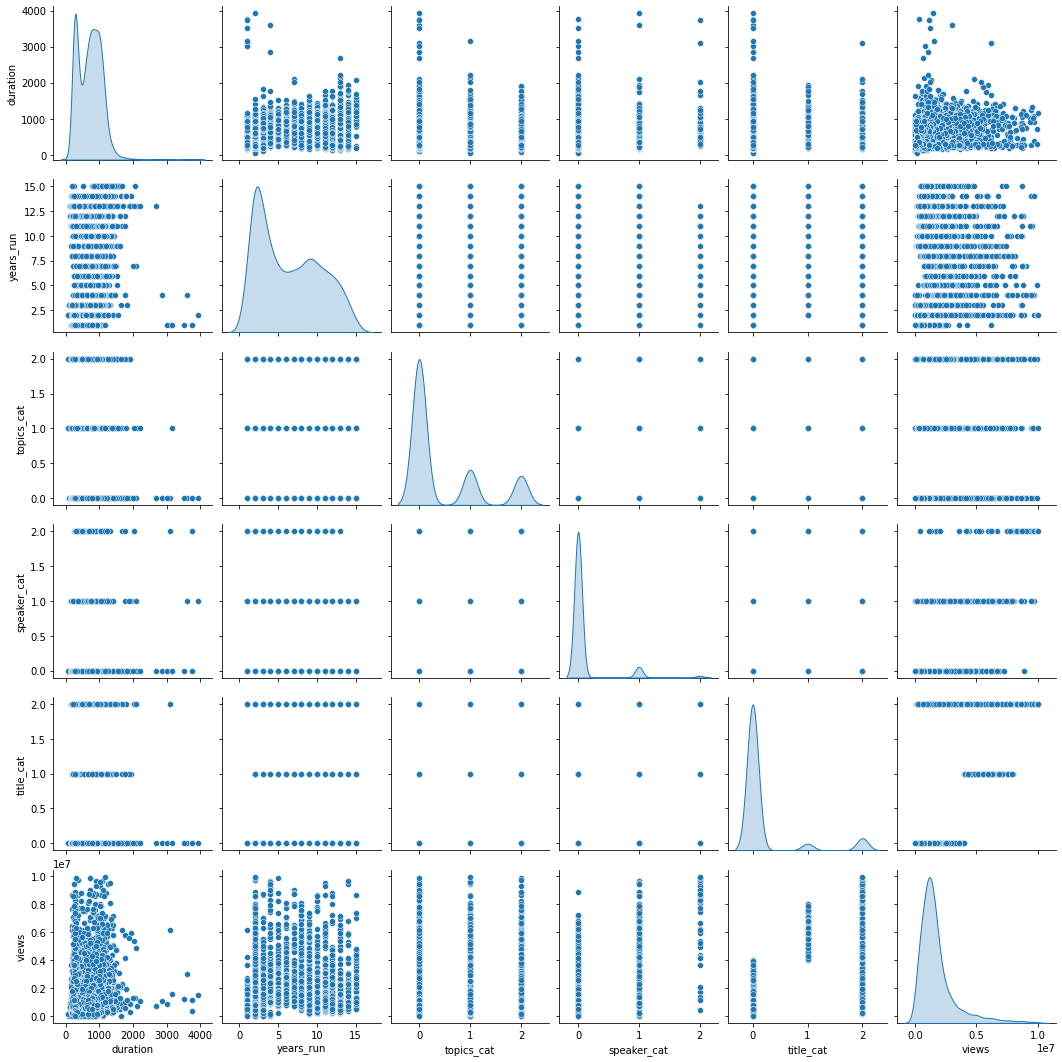

In [74]:
# Univariate, bivariate and multivariate analysis in a single plot
plt.figure(figsize=(7,7))
sns.pairplot(data=ted_talk_df_clean, kind='scatter', diag_kind='kde')
plt.show()

###6.2 Looking for Normal Distribution of Features

divide by zero encountered in log10


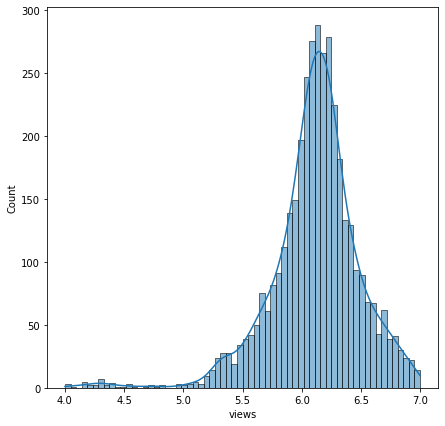

In [75]:
# "views" is extreamly positively scewed, so need log transformation
# Checking the distribution of dependent variable after log transformation
plt.figure(figsize=(7,7))
sns.histplot(np.log10(ted_talk_df_clean['views']), kde=True)
plt.show()

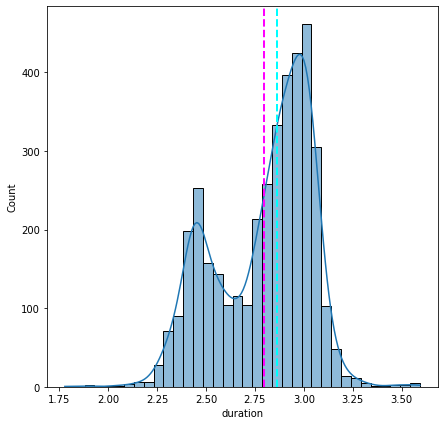

In [76]:
# We can see the 'comments' and 'duration' are also positively skewed. Thus need log transformation
# Checking distribution of 'comments' and 'duration' after log transformation
for col in ted_talk_df_clean.describe().columns[:1]:
    fig = plt.figure(figsize=(7, 7))
    ax = fig.gca()
    feature = np.log10(ted_talk_df_clean[col])
    sns.histplot(feature, kde=True)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)    
plt.show()

###6.3 Looking for Relationship between Dependent and Independent Features

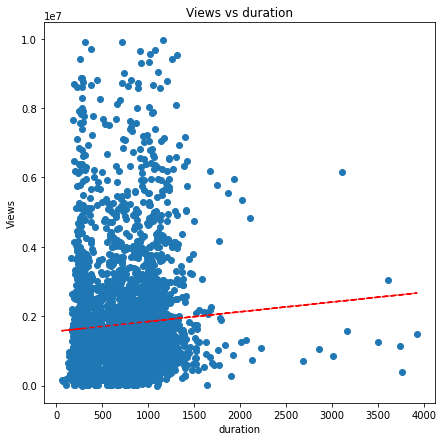

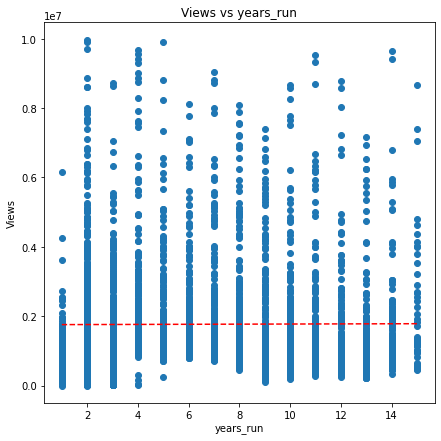

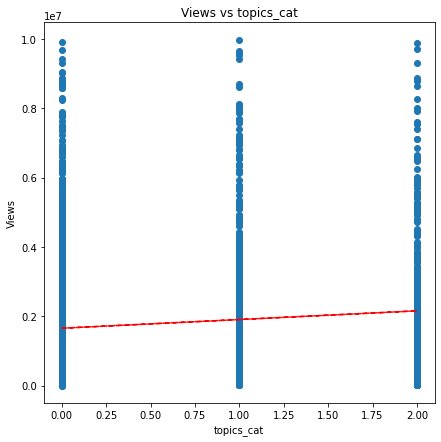

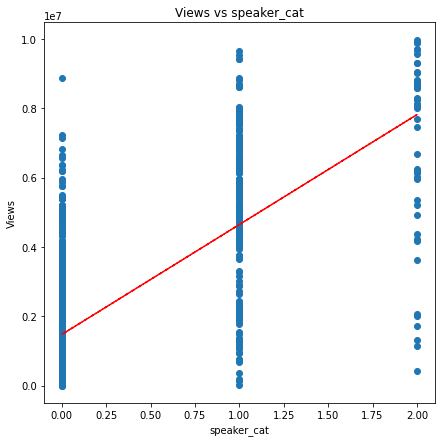

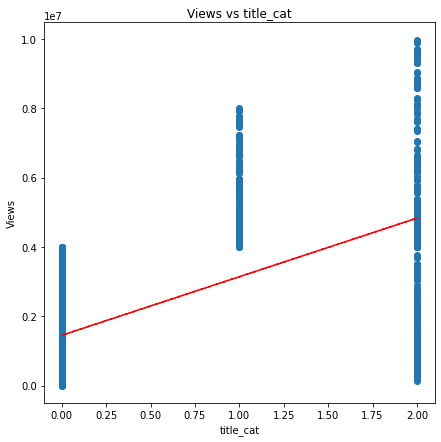

In [77]:
# Checking linearship relation of dependent variable with independent variables
for col in ted_talk_df_clean.describe().columns[:5]:
    fig = plt.figure(figsize=(7, 7))
    ax = fig.gca()
    feature = ted_talk_df_clean[col]
    label = ted_talk_df_clean['views']
    plt.scatter(x=feature, y=label)
    plt.xlabel(col)
    plt.ylabel('Views')
    ax.set_title('Views vs ' + col)
    fit = np.polyfit(feature, label, deg=1) 
    p = np.poly1d(fit) 
    plt.plot(feature,p(feature),"r--") 
plt.show()

###6.4 Looking for Truly Independent Features

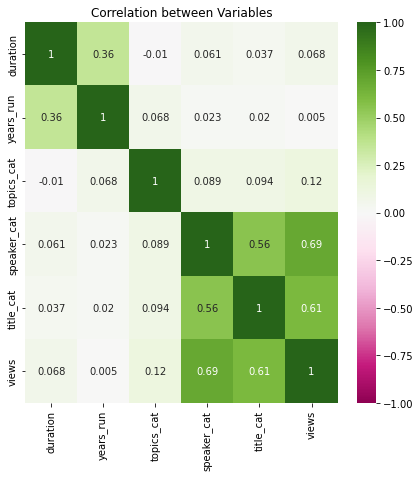

In [78]:
# Checking multicolinearity
plt.figure(figsize=(7,7))
sns.heatmap(ted_talk_df_clean.corr(), vmin=-1, cmap='PiYG', annot=True)
plt.title('Correlation between Variables')
plt.show()

In [79]:
# Creating function for checking VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.


In [80]:
calc_vif(ted_talk_df_clean[[i for i in ted_talk_df_clean.describe().columns if i not in ['views']]])

,variables,VIF
0,duration,3.558988
1,years_run,3.552476
2,topics_cat,1.335001
3,speaker_cat,1.566756
4,title_cat,1.610806


In [81]:
# All the VIF are below 10
# Thus there is no problem of multicolinearity and no need to remove any feature

## **7. Preparation of Input and Output Data**

###7.1 Normalization

In [82]:
# Creating dependent(output) and independent(input) variable
dependent_variable='views'
independent_variables=list(set(ted_talk_df_clean.describe().columns)-{dependent_variable})
print(independent_variables)

['speaker_cat', 'duration', 'title_cat', 'years_run', 'topics_cat']


In [83]:
# Creating normalized input and output dataset
X = np.log10(ted_talk_df_clean[['duration']])
X[list(set(independent_variables)-{'duration'})]=ted_talk_df_clean[list(set(independent_variables)-{'duration'})]

y = np.log10(ted_talk_df_clean[dependent_variable])

divide by zero encountered in log10


In [84]:
# Checking is there any infinite values after normalization
X.describe()

,duration,years_run,speaker_cat,title_cat,topics_cat
count,3868.000000,3868.000000,3868.000000,3868.000000,3868.000000
mean,2.796684,6.394002,0.091779,0.186401,0.444933
std,0.243401,4.004702,0.327365,0.545950,0.724407
min,1.778151,1.000000,0.000000,0.000000,0.000000
25%,2.586587,3.000000,0.000000,0.000000,0.000000
50%,2.864808,6.000000,0.000000,0.000000,0.000000
75%,2.986884,10.000000,0.000000,0.000000,1.000000
max,3.593508,15.000000,2.000000,2.000000,2.000000


In [85]:
y.describe()

count    3868.000000
mean            -inf
std              NaN
min             -inf
25%         5.945351
50%         6.134534
75%         6.313438
max         6.998934
Name: views, dtype: float64

In [86]:
# Imputation of infinite values with zero
for col in X.columns:
  X[col].replace([np.inf, -np.inf], 0, inplace=True)

y.replace([np.inf, -np.inf], 0, inplace=True)

In [87]:
X.describe()

,duration,years_run,speaker_cat,title_cat,topics_cat
count,3868.000000,3868.000000,3868.000000,3868.000000,3868.000000
mean,2.796684,6.394002,0.091779,0.186401,0.444933
std,0.243401,4.004702,0.327365,0.545950,0.724407
min,1.778151,1.000000,0.000000,0.000000,0.000000
25%,2.586587,3.000000,0.000000,0.000000,0.000000
50%,2.864808,6.000000,0.000000,0.000000,0.000000
75%,2.986884,10.000000,0.000000,0.000000,1.000000
max,3.593508,15.000000,2.000000,2.000000,2.000000


In [88]:
y.describe()

count    3868.000000
mean        6.107817
std         0.400211
min         0.000000
25%         5.945351
50%         6.134534
75%         6.313438
max         6.998934
Name: views, dtype: float64

###7.2 Train-Test Spliting

In [89]:
# Splitting of the data into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

###7.3 Scaling

In [90]:
# Standardization of Input Data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [91]:
X_train.shape

(3094, 5)

# **Building and Evaluation of Model-1**

In [92]:
# Model cross validation and hyperparameter tuning
model_rf = RandomForestRegressor()
parameters = {'n_estimators':[int(x) for x in np.linspace(50,500,num=10)], 
              'max_depth':[int(x) for x in np.linspace(5,30,num=6)],
              'max_features':['auto','sqrt'],
              'min_samples_split':[2,5,10,15,100],
              'min_samples_leaf':[1,2,5,10]}
model_rf_cv = RandomizedSearchCV(model_rf, param_distributions=parameters, scoring='r2', cv=3, random_state=0)
model_rf_cv.fit(X_train,y_train)

RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(),
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [50, 100, 150, 200, 250,
                                                         300, 350, 400, 450,
                                                         500]},
                   random_state=0, scoring='r2')

In [93]:
model_rf_cv.best_params_

{'max_depth': 10,
 'max_features': 'sqrt',
 'min_samples_leaf': 10,
 'min_samples_split': 5,
 'n_estimators': 200}

In [94]:
model_rf_final = RandomForestRegressor(max_depth= 5, max_features= 'sqrt',
                                       min_samples_leaf= 2, min_samples_split= 10,
                                       n_estimators= 400)
model_rf_final.fit(X_train,y_train)

RandomForestRegressor(max_depth=5, max_features='sqrt', min_samples_leaf=2,
                      min_samples_split=10, n_estimators=400)

In [95]:
# Checking model performance for train set
y_train_preds_rf = model_rf_final.predict(X_train)
rf_train_rmse=int(math.sqrt(mean_squared_error(10**y_train, 10**y_train_preds_rf)))
print("RMSE:",rf_train_rmse)
rf_train_r2=round(r2_score(10**y_train, 10**y_train_preds_rf),2)
print("R2:",rf_train_r2)

RMSE: 956077
R2: 0.6


In [96]:
# Checking model performance for test set
y_test_preds_rf = model_rf_final.predict(X_test)
rf_test_rmse=int(math.sqrt(mean_squared_error(10**y_test, 10**y_test_preds_rf)))
print("RMSE:",rf_test_rmse)
rf_test_r2=round(r2_score(10**y_test, 10**y_test_preds_rf),2)
print("R2:",rf_test_r2)

RMSE: 906040
R2: 0.63


  0%|          | 0/774 [00:00<?, ?it/s]

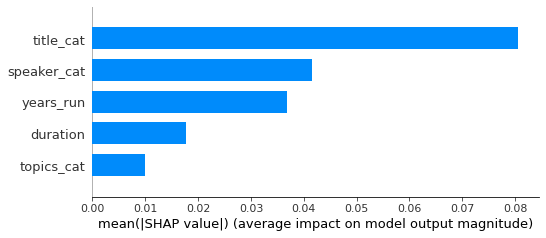

In [97]:
# Checking feature importances
shap_values = shap.KernelExplainer(model_rf_final.predict, X_train[100:200], link='identity').shap_values(X_test)
shap.summary_plot(shap_values, X_test, feature_names=list(X.columns), plot_type="bar")

# **Building  and Evaluation of Model-2**

In [98]:
# Model cross validation and hyperparameter tuning
model_ridge=Ridge()
parameters = {'alpha':[int(x) for x in np.linspace(10,200,num=20)], 
              'max_iter':[int(x) for x in np.linspace(10,200,num=20)], 'tol':[0.1,0.2],'fit_intercept':[True]}
model_ridge_cv = RandomizedSearchCV(model_ridge, param_distributions=parameters, scoring='r2', cv=3, random_state=0)
model_ridge_cv.fit(X_train,y_train)

RandomizedSearchCV(cv=3, estimator=Ridge(),
                   param_distributions={'alpha': [10, 20, 30, 40, 50, 60, 70,
                                                  80, 90, 100, 110, 120, 130,
                                                  140, 150, 160, 170, 180, 190,
                                                  200],
                                        'fit_intercept': [True],
                                        'max_iter': [10, 20, 30, 40, 50, 60, 70,
                                                     80, 90, 100, 110, 120, 130,
                                                     140, 150, 160, 170, 180,
                                                     190, 200],
                                        'tol': [0.1, 0.2]},
                   random_state=0, scoring='r2')

In [99]:
model_ridge_cv.best_params_

{'alpha': 100, 'fit_intercept': True, 'max_iter': 150, 'tol': 0.2}

In [100]:
model_ridge_final=Ridge(alpha=100, fit_intercept=True, max_iter=150, tol=0.2)
model_ridge_final.fit(X_train,y_train)

Ridge(alpha=100, max_iter=150, tol=0.2)

In [101]:
# Checking model performance for train set
y_train_preds_ridge = model_ridge_final.predict(X_train)
ridge_train_rmse=int(math.sqrt(mean_squared_error(10**y_train, 10**y_train_preds_ridge)))
print("RMSE:",ridge_train_rmse)
ridge_train_r2=round(r2_score(10**y_train, 10**y_train_preds_ridge),2)
print("R2:", ridge_train_r2)

RMSE: 1123188
R2: 0.45


In [102]:
# Checking model performance for test set
y_test_preds_ridge = model_ridge_final.predict(X_test)
ridge_test_rmse=int(math.sqrt(mean_squared_error(10**y_test, 10**y_test_preds_ridge)))
print("RMSE:", ridge_test_rmse)
ridge_test_r2=round(r2_score(10**y_test, 10**y_test_preds_ridge),2)
print("R2:", ridge_test_r2)

RMSE: 1051682
R2: 0.5


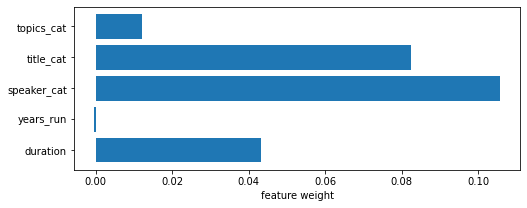

In [103]:
# Checking Feature importance
plt.figure(figsize=(8, 3))
y=list(X.columns)
x=list(model_ridge_final.coef_)
plt.barh(y,x)
plt.xlabel('feature weight')
plt.show()

# **Building  and Evaluation of Model-3**

In [104]:
# Model cross validation and hyperparameter tuning
model_svr = SVR()
parameters = {'gamma':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9], 
              'C':[int(x) for x in np.linspace(1,10,num=10)]}
model_svr_cv = RandomizedSearchCV(model_svr, param_distributions=parameters, scoring='r2', cv=3, random_state=0)
model_svr_cv.fit(X_train, y_train)

RandomizedSearchCV(cv=3, estimator=SVR(),
                   param_distributions={'C': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                                        'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6,
                                                  0.7, 0.8, 0.9]},
                   random_state=0, scoring='r2')

In [105]:
model_svr_cv.best_params_

{'C': 6, 'gamma': 0.1}

In [106]:
model_svr_final=SVR(C= 6, gamma= 0.1)
model_svr_final.fit(X_train, y_train)

SVR(C=6, gamma=0.1)

In [107]:
# Checking model performance for train set
y_train_preds_svr = model_svr_final.predict(X_train)
svr_train_rmse=int(math.sqrt(mean_squared_error(10**y_train, 10**y_train_preds_svr)))
print("RMSE:", svr_train_rmse)
svr_train_r2=round(r2_score(10**y_train, 10**y_train_preds_svr),2)
print("R2:", svr_train_r2)

RMSE: 882109
R2: 0.66


In [108]:
# Checking model performance for test set
y_test_preds_svr = model_svr_final.predict(X_test)
svr_test_rmse=int(math.sqrt(mean_squared_error(10**y_test, 10**y_test_preds_svr)))
print("RMSE:", svr_test_rmse)
svr_test_r2=round(r2_score(10**y_test, 10**y_test_preds_svr),2)
print("R2:", svr_test_r2)

RMSE: 865653
R2: 0.66


  0%|          | 0/774 [00:00<?, ?it/s]

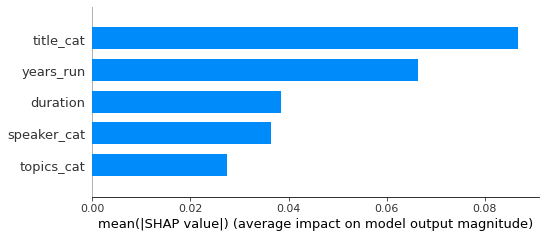

In [109]:
# Checking feature importances
shap_values = shap.KernelExplainer(model_svr_final.predict, X_train[100:200], link='identity').shap_values(X_test)
shap.summary_plot(shap_values, X_test, feature_names=list(X.columns), plot_type="bar")


  0%|          | 0/774 [00:00<?, ?it/s]

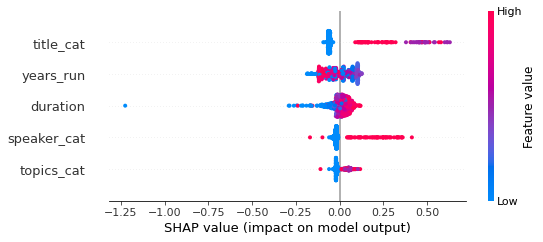

In [110]:
# Checking feature importances
shap_values = shap.KernelExplainer(model_svr_final.predict, X_train[100:200], link='identity').shap_values(X_test)
shap.summary_plot(shap_values, X_test, feature_names=list(X.columns), plot_type="dot")

# **Conclusion**

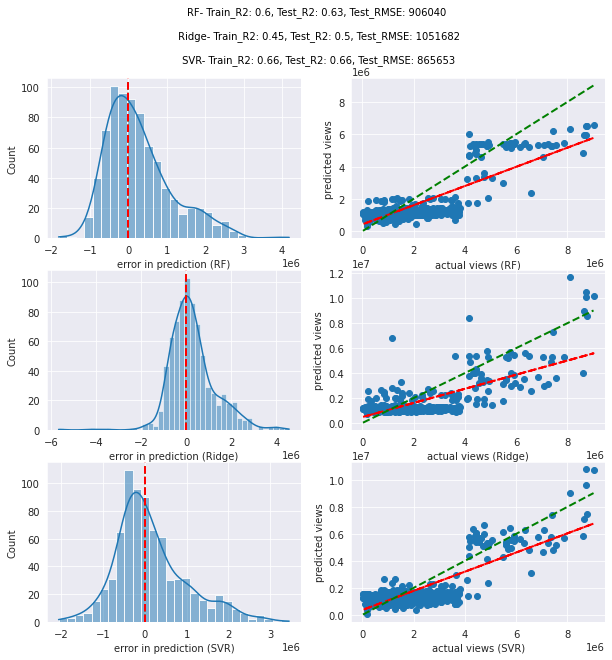

In [111]:
# Performance Comparison of Models
plt.figure(figsize=(10, 10))
plt.suptitle(f'RF- Train_R2: {rf_train_r2}, Test_R2: {rf_test_r2}, Test_RMSE: {rf_test_rmse}\n\n Ridge- Train_R2: {ridge_train_r2}, Test_R2: {ridge_test_r2}, Test_RMSE: {ridge_test_rmse}\n\n SVR- Train_R2: {svr_train_r2}, Test_R2: {svr_test_r2}, Test_RMSE: {svr_test_rmse}', fontsize=10)
sns.set_style("darkgrid")

plt.subplot(3,2, 1)
sns.histplot(10**y_test-10**y_test_preds_rf, kde=True)
plt.axvline(0, color ='green', linestyle ="--", linewidth = 2)
plt.axvline((y_test-y_test_preds_rf).mean(), color='red', linestyle='--', linewidth=2)
plt.xlabel('error in prediction (RF)')

plt.subplot(3,2, 2)
plt.scatter(10**y_test, 10**y_test_preds_rf)
fit = np.polyfit(10**y_test, 10**y_test_preds_rf, deg=1) 
p = np.poly1d(fit) 
plt.plot(10**y_test,p(10**y_test),"r--",linewidth = 2) 
plt.plot([10**y_test.min(),10**y_test.mean(),10**y_test.max()], [10**y_test.min(),10**y_test.mean(),10**y_test.max()],"g--",linewidth = 2) 
plt.ylabel('predicted views')
plt.xlabel('actual views (RF)')

plt.subplot(3,2, 3)
sns.histplot(10**y_test-10**y_test_preds_ridge, kde=True)
plt.axvline(0, color ='green', linestyle ="--", linewidth = 2)
plt.axvline((y_test-y_test_preds_ridge).mean(), color='red', linestyle='--', linewidth=2)
plt.xlabel('error in prediction (Ridge)')

plt.subplot(3,2, 4)
plt.scatter(10**y_test, 10**y_test_preds_ridge)
fit = np.polyfit(10**y_test, 10**y_test_preds_ridge, deg=1) 
p = np.poly1d(fit) 
plt.plot(10**y_test,p(10**y_test),"r--",linewidth = 2) 
plt.plot([10**y_test.min(),10**y_test.mean(),10**y_test.max()], [10**y_test.min(),10**y_test.mean(),10**y_test.max()],"g--",linewidth = 2) 
plt.ylabel('predicted views')
plt.xlabel('actual views (Ridge)')

plt.subplot(3,2, 5)
sns.histplot(10**y_test-10**y_test_preds_svr, kde=True)
plt.axvline(0, color ='green', linestyle ="--", linewidth = 2)
plt.axvline((y_test-y_test_preds_svr).mean(), color='red', linestyle='--', linewidth=2)
plt.xlabel('error in prediction (SVR)')

plt.subplot(3,2, 6)
plt.scatter(10**y_test, 10**y_test_preds_svr)
fit = np.polyfit(10**y_test, 10**y_test_preds_svr, deg=1) 
p = np.poly1d(fit) 
plt.plot(10**y_test,p(10**y_test),"r--",linewidth = 2) 
plt.plot([10**y_test.min(),10**y_test.mean(),10**y_test.max()], [10**y_test.min(),10**y_test.mean(),10**y_test.max()],"g--",linewidth = 2) 
plt.ylabel('predicted views')
plt.xlabel('actual views (SVR)')

plt.show()

i. In our final Random Forest model, test r2_score is 63% and variance in prediction is 3%

ii. In our final Ridge model, test r2_score is 50% and variance in prediction is 5%

iii. In our final SVR model, test r2_score is 66% and variance in prediction is 0%

iv. On the basis of the performance study of our three models, we are selecting **Support Vector Regressor** (*the best warrior*) for predicting ted_talk views, as it has the lowest variance in prediction and highest r2_score among all three models models